<center>
<img src="../../img/ods_stickers.jpg">
# <center> Открытый курс по машинному обучению
Автор материала: аналитик-разработчик в команде Яндекс.Метрики Мария Мансурова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных с Python
## <center>Часть 3. Рисуем на карте


В начале как всегда настроим окружение: импортируем все необходимые библиотеки и немного настроим дефолтное отображение картинок.

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.path as mplPath
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import numpy as np

import folium
from folium.plugins import MarkerCluster

import requests
import json

Запомним координаты города

In [2]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945

И сгенерируем случайные места

In [3]:
data_moscow = pd.DataFrame({'latitude': np.random.uniform(mos_min_lat,mos_max_lat,size=1500),
                            'longitude': np.random.uniform(mos_min_lon,mos_max_lon,size=1500)})
data_moscow.shape

(1500, 2)

In [4]:
data_moscow.head()

,latitude,longitude
0,55.764234,37.511976
1,55.740092,37.381966
2,55.712883,37.539831
3,55.844083,37.613071
4,55.898854,37.666968


Создадим карту с начальной позицией

In [5]:
moscow = folium.Map(location=mos_center, zoom_start=10, control_scale=True)

И добавим маркеры в кластер

In [6]:
marker_cluster = MarkerCluster(locations=data_moscow.loc[::2, 'latitude':'longitude'].values)
marker_cluster.add_to(moscow)

In [7]:
moscow

Теперь посмотрим на точки в пределах МКАД

In [8]:
res = requests.get('http://pastebin.com/raw/DKgMrxqF')

In [9]:
mkad = np.array(json.loads(res.text)[0])

In [10]:
data_moscow['points'] = list(zip(data_moscow.latitude, data_moscow.longitude))
data_moscow.head()

,latitude,longitude,points
0,55.764234,37.511976,"(55.76423402589528, 37.51197576542826)"
1,55.740092,37.381966,"(55.74009179166801, 37.38196556360187)"
2,55.712883,37.539831,"(55.71288297338351, 37.53983114022605)"
3,55.844083,37.613071,"(55.8440832997931, 37.613071263723434)"
4,55.898854,37.666968,"(55.89885376921475, 37.66696827727566)"


Созданные объекты распределены по прямоугольнику

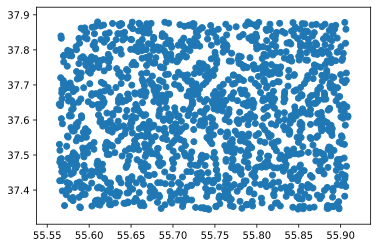

In [11]:
plt.scatter(data_moscow.latitude, data_moscow.longitude)

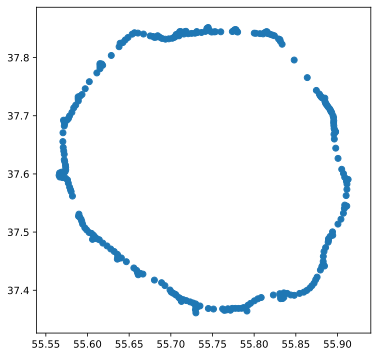

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(mkad[:,0], mkad[:,1])

Модуль Path для работы с ломанными линиями

In [13]:
bbPath = mplPath.Path(mkad)

Отдельно сохраним маску объектов

In [14]:
in_map = data_moscow['points'].apply(lambda x: bbPath.contains_point(x))

Посмотрим на получившийся рисунок

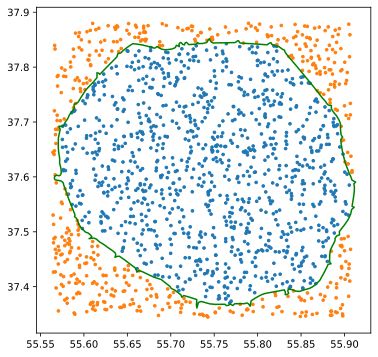

In [15]:
plt.figure(figsize=(6,6))
# plt.scatter(mkad[:,0], mkad[:,1])
plt.plot(mkad[:,0], mkad[:,1], c='green')

plt.scatter(data_moscow.latitude[in_map], data_moscow.longitude[in_map], s=7)
plt.scatter(data_moscow.latitude[~in_map], data_moscow.longitude[~in_map], s=7)
plt.show()

Заново отрисуем их на карте

In [16]:
moscow = folium.Map(location=mos_center, zoom_start=10, control_scale=True)

In [17]:
marker_cluster = MarkerCluster(locations=data_moscow[in_map].loc[::2, 'latitude':'longitude'].values)
marker_cluster.add_to(moscow)

In [18]:
moscow